# NewuFruit WMC22

#### Load libraries
The first step is to load the required libraries

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

import numpy as np

#### Load the clients database

###### It contains these variables:
<b>CLIENT ID:</b> Unique client identifier<br>
<b>CLIENT_SEGMENT:</b> Client segment<br>
<b>AVG CONSO:</b> Monthly average consumption (in fruit pieces) at the end of 2020<br>
<b>AVG BASKET SIZE:</b> Average basket size (in fruit pieces) at the end of 2020<br>
<b>RECEIVED_COMMUNICATION:</b> 1 = Promotion communication received / 0 = not received


In [30]:
clientsdf=pd.read_csv('mwc22-client_table.csv')
clientsdf.tail(5)

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
35879,48345531,4,"12,5",150,1
35880,48345686,3,"37,5","112,5",1
35881,48365750,3,"41,67",125,1
35882,48365861,3,"62,58","125,17",1
35883,48365940,1,"89,17","152,86",1


In [3]:
clientsdf.isnull().sum()

CLIENT ID                 0
CLIENT_SEGMENT            0
AVG CONSO                 0
AVG BASKET SIZE           0
RECEIVED_COMMUNICATION    0
dtype: int64

There are no null values

In [4]:
clientsdf.dtypes

CLIENT ID                  int64
CLIENT_SEGMENT             int64
AVG CONSO                 object
AVG BASKET SIZE           object
RECEIVED_COMMUNICATION     int64
dtype: object

In [5]:
# Change Data Type
clientsdf['AVG CONSO']=clientsdf['AVG CONSO'].str.replace(',','.').astype(float)
clientsdf['AVG BASKET SIZE']=clientsdf['AVG BASKET SIZE'].str.replace(',','.').astype(float)

##### Number of clents per segments

In [6]:
dfseg=clientsdf['CLIENT_SEGMENT'].value_counts().reset_index()
dfseg['index']='segment ' + dfseg['index'].astype(str)
dfseg.columns=['segments','total_clients']
dfseg.sort_values(by=['segments'])

,segments,total_clients
3,segment 1,6505
2,segment 2,6760
0,segment 3,8123
1,segment 4,7927
4,segment 5,3429
5,segment 6,3140


In [7]:
# Colour palettes
clr7=['#668866','#c65555','#2398a6','#b9296f','#d387d2','#a271cf','#9ebff1']
clr6=['#668866','#c65555','#2398a6','#b9296f','#d387d2','#a271cf']

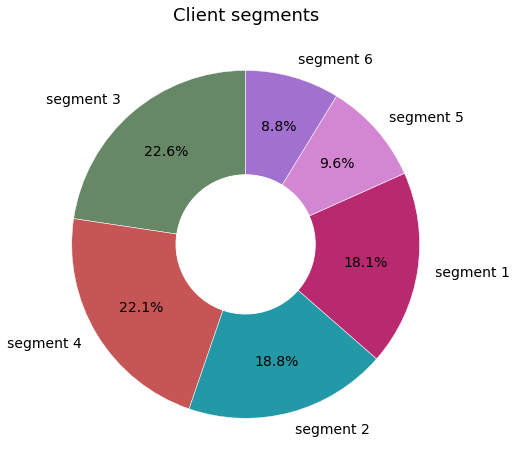

In [8]:
plt.figure(figsize=(8,8))
plt.pie(dfseg['total_clients'],labels= list(dfseg['segments']), autopct='%.1f%%',colors = clr6,
        startangle=90,pctdistance = 0.7 ,textprops={'fontsize': 14},
       wedgeprops = { 'linewidth' : 0.5, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Client segments', fontsize=18)

plt.show()

In [9]:
print('Average Monthly consumtion:',round(clientsdf['AVG CONSO'].mean(),2),'pieces')
print('Average Basket size:',round(clientsdf['AVG BASKET SIZE'].mean(),2),'pieces')

Average Monthly consumtion: 64.53 pieces
Average Basket size: 181.22 pieces


##### Received communications

In [10]:
dfcomm=clientsdf['RECEIVED_COMMUNICATION'].value_counts().reset_index()
a1,a2=dfcomm['RECEIVED_COMMUNICATION'][0],dfcomm['RECEIVED_COMMUNICATION'][1]

print(a1,'of clients received the communication', 'a', round(a1/(a1+a2)*100,2),'%')
print(a2,'of clients didn\'t receive the communication', 'a', round(a2/(a1+a2)*100,2),'%')

18229 of clients received the communication a 50.8 %
17655 of clients didn't receive the communication a 49.2 %


<br>
After checking the general reach of the communications, the next step is to review the communications per segments

In [11]:
fdc1=clientsdf[clientsdf['CLIENT_SEGMENT']==1]['RECEIVED_COMMUNICATION'].value_counts().reset_index()
fdc1.columns=['Received_communication','total']
fdc1.sort_values(by=['Received_communication'], ascending=False,inplace=True)

fdc2=clientsdf[clientsdf['CLIENT_SEGMENT']==2]['RECEIVED_COMMUNICATION'].value_counts().reset_index()
fdc2.columns=['Received_communication','total']
fdc2.sort_values(by=['Received_communication'], ascending=False,inplace=True)

fdc3=clientsdf[clientsdf['CLIENT_SEGMENT']==3]['RECEIVED_COMMUNICATION'].value_counts().reset_index()
fdc3.columns=['Received_communication','total']
fdc3.sort_values(by=['Received_communication'], ascending=False,inplace=True)

fdc4=clientsdf[clientsdf['CLIENT_SEGMENT']==4]['RECEIVED_COMMUNICATION'].value_counts().reset_index()
fdc4.columns=['Received_communication','total']
fdc4.sort_values(by=['Received_communication'], ascending=False,inplace=True)

fdc5=clientsdf[clientsdf['CLIENT_SEGMENT']==5]['RECEIVED_COMMUNICATION'].value_counts().reset_index()
fdc5.columns=['Received_communication','total']
fdc5.sort_values(by=['Received_communication'], ascending=False,inplace=True)

fdc6=clientsdf[clientsdf['CLIENT_SEGMENT']==6]['RECEIVED_COMMUNICATION'].value_counts().reset_index()
fdc6.columns=['Received_communication','total']
fdc6.sort_values(by=['Received_communication'], ascending=False,inplace=True)


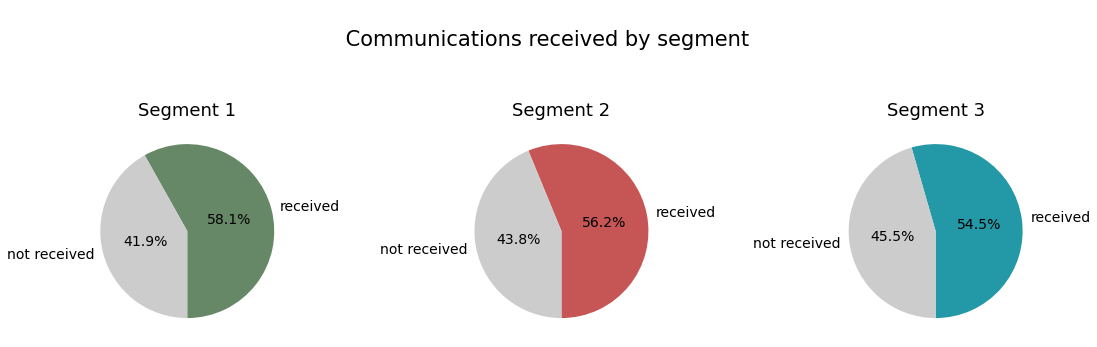

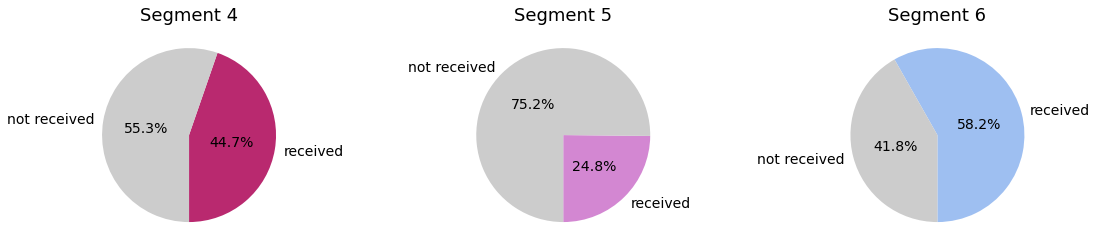

In [12]:
labels=['received','not received']

fig, ax = plt.subplots(1,3,figsize=(19,4))

ax[0].pie(fdc1['total'],labels=labels, autopct='%.1f%%',colors = ['#668866','#ccc'],
        pctdistance = 0.5 ,textprops={'fontsize': 14},startangle=270)
ax[0].set_title('Segment 1',fontsize= 18)

ax[1].pie(fdc2['total'],labels=labels, autopct='%.1f%%',colors = [clr7[1],'#ccc'],
        pctdistance = 0.5 ,textprops={'fontsize': 14},startangle=270)
ax[1].set_title('Segment 2',fontsize= 18)

ax[2].pie(fdc3['total'],labels=labels, autopct='%.1f%%',colors = [clr7[2],'#ccc'],
        pctdistance = 0.5 ,textprops={'fontsize': 14},startangle=270)
ax[2].set_title('Segment 3',fontsize= 18)

fig.suptitle(" \n Communications received by segment", y=1.28,fontsize= 21)

fig, ax = plt.subplots(1,3,figsize=(19,4))

ax[0].pie(fdc4['total'],labels=labels, autopct='%.1f%%',colors = [clr7[3],'#ccc'],
        pctdistance = 0.5 ,textprops={'fontsize': 14},startangle=270)
ax[0].set_title('Segment 4',fontsize= 18)

ax[1].pie(fdc5['total'],labels=labels, autopct='%.1f%%',colors = [clr7[4],'#ccc'],
        pctdistance = 0.5 ,textprops={'fontsize': 14},startangle=270)
ax[1].set_title('Segment 5',fontsize= 18)

ax[2].pie(fdc6['total'],labels=labels, autopct='%.1f%%',colors = [clr7[6],'#ccc'],
        pctdistance = 0.5 ,textprops={'fontsize': 14},startangle=270)
ax[2].set_title('Segment 6',fontsize= 18)



plt.show()

##### <br>Average consumption and Basket size per segment

In [13]:
segmentsdf=clientsdf[['CLIENT_SEGMENT','AVG CONSO','AVG BASKET SIZE']].groupby(['CLIENT_SEGMENT']).mean().reset_index()
segmentsdf

,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE
0,1,132.278692,190.336475
1,2,87.360251,298.595682
2,3,43.331350,163.602114
3,4,20.868018,105.475273
4,5,6.600367,56.872805
5,6,103.404949,282.211369


Looking at the averages, at a first glance, only segment 5 pups up beacuse their Average basket size is considerably smaller than the others ( this also reflects it is the segment which receives less promotions).
Adding an extra column with the relation between consumption and basket size might show some other differences between segments

In [14]:
segmentsdf['REL']=round(segmentsdf['AVG CONSO']/segmentsdf['AVG BASKET SIZE']*100,2)
segmentsdf

,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,REL
0,1,132.278692,190.336475,69.50
1,2,87.360251,298.595682,29.26
2,3,43.331350,163.602114,26.49
3,4,20.868018,105.475273,19.78
4,5,6.600367,56.872805,11.61
5,6,103.404949,282.211369,36.64


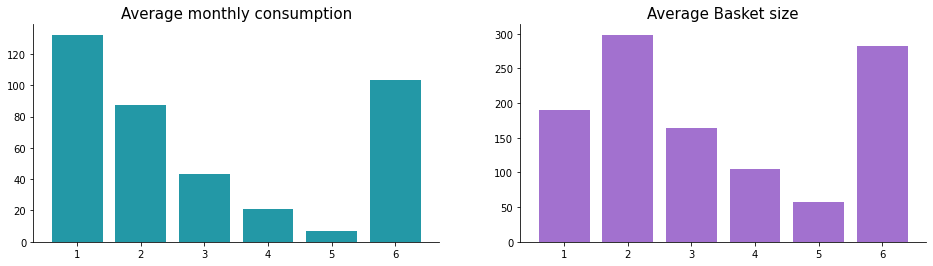

In [15]:
fig, ax = plt.subplots(1,2,figsize=(16,4))

ax[0].bar(segmentsdf['CLIENT_SEGMENT'],segmentsdf['AVG CONSO'], color=clr6[2])
ax[0].set_title('Average monthly consumption',fontsize= 15)

ax[1].bar(segmentsdf['CLIENT_SEGMENT'],segmentsdf['AVG BASKET SIZE'], color=clr6[5])
ax[1].set_title('Average Basket size',fontsize= 15)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

<br><br><br><br>

#### Load the orders database

###### It contains these variables:
<b>CLIENT ID:</b> Unique client identifier<br>
<b>NB PRODS:</b> Order 'prods'number of the fruit variety (1 prod = 10 fruit pieces)<br>
<b>ORDER ID:</b> Unique order identifier<br>
<b>FRUIT_PRODUCT:</b> Fruit type


In [16]:
oredrssdf=pd.read_csv('mwc22-orders_table.csv')
oredrssdf.head(2)

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange


In [17]:
oredrssdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66912 entries, 0 to 66911
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CLIENT ID      66912 non-null  int64 
 1   NB PRODS       66912 non-null  int64 
 2   ORDER ID       66912 non-null  int64 
 3   FRUIT_PRODUCT  66912 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


There are no null values

#### Merging both datasets on ClientID

In [57]:
maindf= pd.merge(oredrssdf,clientsdf,how='left', on='CLIENT ID', suffixes=('', '_drop'))
maindf.drop([col for col in maindf.columns if 'drop' in col], axis=1, inplace=True)
maindf.head(3)

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,18070505,5,671907264,Apple,NaN,NaN,NaN,NaN
1,18070505,10,671907264,Orange,NaN,NaN,NaN,NaN
2,18070505,5,671907264,Kiwi,NaN,NaN,NaN,NaN


In [58]:
maindf.isnull().sum()

CLIENT ID                  0
NB PRODS                   0
ORDER ID                   0
FRUIT_PRODUCT              0
CLIENT_SEGMENT            40
AVG CONSO                 40
AVG BASKET SIZE           40
RECEIVED_COMMUNICATION    40
dtype: int64

In [59]:
maindf[maindf['CLIENT_SEGMENT'].isna()]['CLIENT ID'].value_counts()

18071233    8
18071668    7
18071016    6
18072741    6
18072797    6
18070505    5
18072186    2
Name: CLIENT ID, dtype: int64

In [60]:
len(maindf['CLIENT ID'].unique())

14499

In [77]:
#As there are 7 clients IDs out of 14400 missimg from the clients db, they will be removes
maindf=maindf.dropna().reset_index(drop=True)
maindf.head(3)

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,18073169,3,675518868,Kiwi,6.0,50,150,1.0
1,18073169,4,675518868,Lemon,6.0,50,150,1.0
2,18073169,7,675518868,Cheery,6.0,50,150,1.0


##### <br>Most ordered fruits

In [70]:
fruitsdf=maindf.groupby(['FRUIT_PRODUCT'])['NB PRODS'].sum().sort_values(ascending=False).reset_index()
fruitsdf

,FRUIT_PRODUCT,NB PRODS
0,Kiwi,36011
1,Lemon,34061
2,Orange,33145
3,Cheery,26797
4,Pear,22776
5,Nuwe Fruit,19846
6,Nectarine,18934
7,Banana,17662
8,Coconut,11862
9,Apricot,9774


In [73]:
colours=['#ec3142','#EF5260','#E95B61','#E36461','#DD6D62','#D77663','#D17F64','#CC8764','#C69065','#C09966','#BAA267','#B4AB67','#AEB468','#A5AF6F','#9CAA75','#92A57C','#89A082','#809B89','#77958F','#6E9096','#658B9C','#5B86A3','#5281A9','#497CB0','#3f6b96']
len(colours[:23])

23

<function matplotlib.pyplot.show(close=None, block=None)>

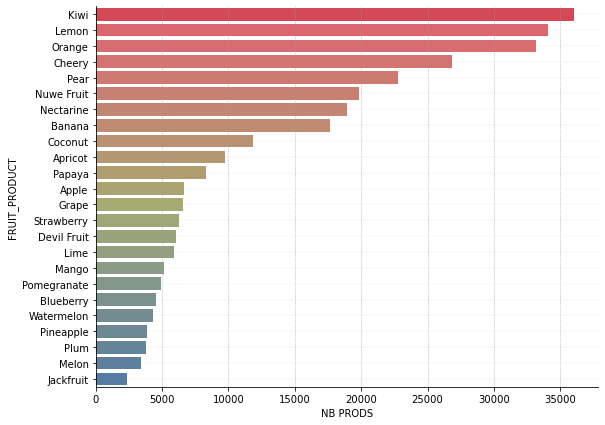

In [76]:
plt.figure(figsize=(9,7))
sns.barplot(x="NB PRODS", y="FRUIT_PRODUCT", data=fruitsdf, palette=colours[:24])
plt.grid(color='#999', linestyle='dotted', linewidth=0.7, axis='x')
plt.grid(color='#999', linestyle='dotted', linewidth=0.2, axis='y')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show

In [128]:
frtdf1=maindf[maindf['CLIENT_SEGMENT']==1.0].groupby(['CLIENT_SEGMENT','FRUIT_PRODUCT'])['NB PRODS'].sum().sort_values(ascending=False)[:10].reset_index().drop(['CLIENT_SEGMENT'],axis=1)
frtdf2=maindf[maindf['CLIENT_SEGMENT']==2.0].groupby(['CLIENT_SEGMENT','FRUIT_PRODUCT'])['NB PRODS'].sum().sort_values(ascending=False)[:10].reset_index().drop(['CLIENT_SEGMENT'],axis=1)
frtdf3=maindf[maindf['CLIENT_SEGMENT']==3.0].groupby(['CLIENT_SEGMENT','FRUIT_PRODUCT'])['NB PRODS'].sum().sort_values(ascending=False)[:10].reset_index().drop(['CLIENT_SEGMENT'],axis=1)
frtdf4=maindf[maindf['CLIENT_SEGMENT']==4.0].groupby(['CLIENT_SEGMENT','FRUIT_PRODUCT'])['NB PRODS'].sum().sort_values(ascending=False)[:10].reset_index().drop(['CLIENT_SEGMENT'],axis=1)
frtdf5=maindf[maindf['CLIENT_SEGMENT']==5.0].groupby(['CLIENT_SEGMENT','FRUIT_PRODUCT'])['NB PRODS'].sum().sort_values(ascending=False)[:10].reset_index().drop(['CLIENT_SEGMENT'],axis=1)
frtdf6=maindf[maindf['CLIENT_SEGMENT']==6.0].groupby(['CLIENT_SEGMENT','FRUIT_PRODUCT'])['NB PRODS'].sum().sort_values(ascending=False)[:10].reset_index().drop(['CLIENT_SEGMENT'],axis=1)
frtdf1.head(1)

,FRUIT_PRODUCT,NB PRODS
0,Kiwi,13213


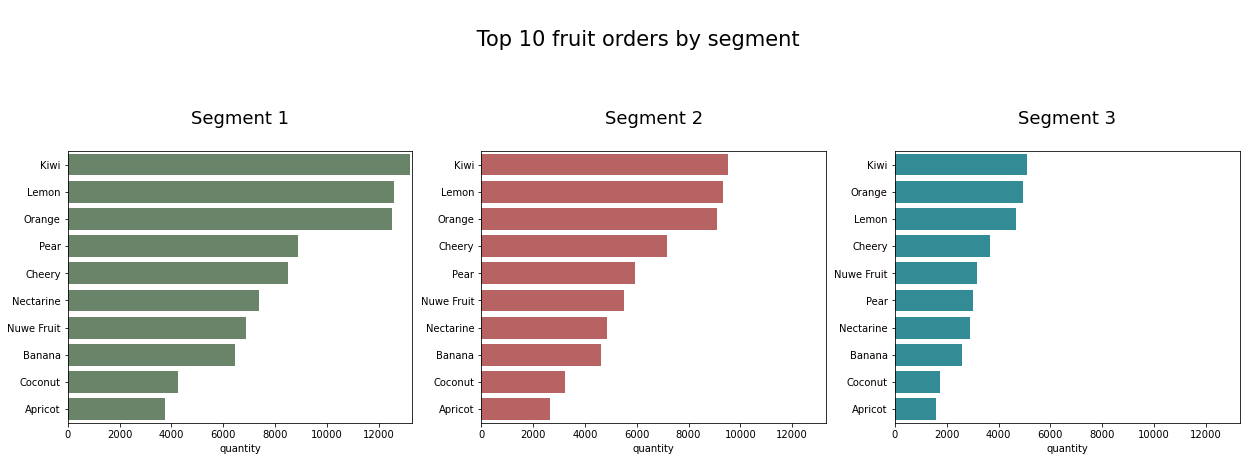

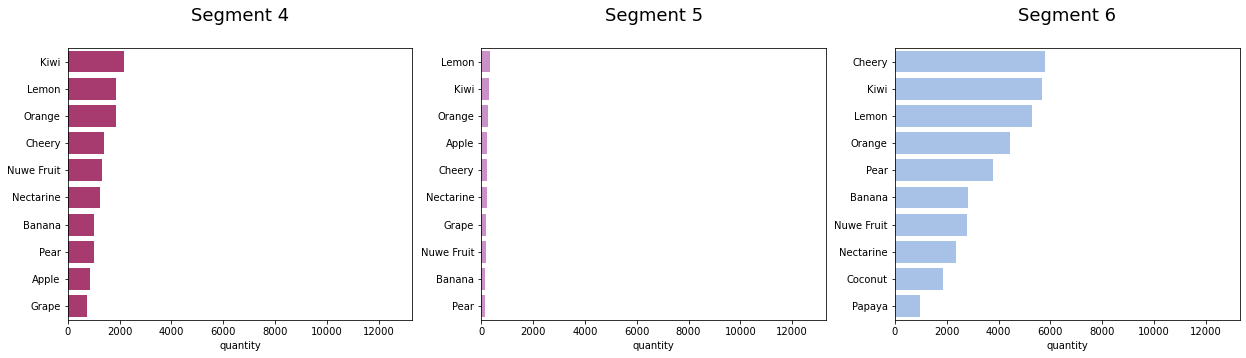

In [138]:
fig, ax = plt.subplots(1,3,figsize=(21,5))

sns.barplot(x="NB PRODS", y="FRUIT_PRODUCT", data=frtdf1,ax=ax[0], color=clr7[0])
ax[0].set_title('Segment 1\n',fontsize= 18)
ax[0].set(xlabel='quantity', ylabel='',xlim=(0, 13300))

sns.barplot(x="NB PRODS", y="FRUIT_PRODUCT", data=frtdf2,ax=ax[1], color=clr7[1])
ax[1].set_title('Segment 2\n',fontsize= 18)
ax[1].set(xlabel='quantity', ylabel='',xlim=(0, 13300))

sns.barplot(x="NB PRODS", y="FRUIT_PRODUCT", data=frtdf3,ax=ax[2], color=clr7[2])
ax[2].set_title('Segment 3\n',fontsize= 18)
ax[2].set(xlabel='quantity', ylabel='',xlim=(0, 13300))

fig.suptitle(" \n Top 10 fruit orders by segment", y=1.28,fontsize= 21)

fig, ax = plt.subplots(1,3,figsize=(21,5))

sns.barplot(x="NB PRODS", y="FRUIT_PRODUCT", data=frtdf4,ax=ax[0], color=clr7[3])
ax[0].set_title('Segment 4\n',fontsize= 18)
ax[0].set(xlabel='quantity', ylabel='',xlim=(0, 13300))

sns.barplot(x="NB PRODS", y="FRUIT_PRODUCT", data=frtdf5,ax=ax[1], color=clr7[4])
ax[1].set_title('Segment 5\n',fontsize= 18)
ax[1].set(xlabel='quantity', ylabel='',xlim=(0, 13300))

sns.barplot(x="NB PRODS", y="FRUIT_PRODUCT", data=frtdf6,ax=ax[2], color=clr7[6])
ax[2].set_title('Segment 6\n',fontsize= 18)
ax[2].set(xlabel='quantity', ylabel='',xlim=(0, 13300))


plt.show()

In [139]:
maindf[maindf['RECEIVED_COMMUNICATION']==1.0].groupby(['RECEIVED_COMMUNICATION','FRUIT_PRODUCT'])['NB PRODS'].sum().sort_values(ascending=False)[:10].reset_index()

,RECEIVED_COMMUNICATION,FRUIT_PRODUCT,NB PRODS
0,1.0,Kiwi,22054
1,1.0,Lemon,21074
2,1.0,Orange,20265
3,1.0,Cheery,19152
4,1.0,Pear,15735
5,1.0,Banana,11970
6,1.0,Nectarine,11314
7,1.0,Nuwe Fruit,11212
8,1.0,Coconut,8819
9,1.0,Apple,4792


In [140]:
maindf[maindf['RECEIVED_COMMUNICATION']!=1.0].groupby(['RECEIVED_COMMUNICATION','FRUIT_PRODUCT'])['NB PRODS'].sum().sort_values(ascending=False)[:10].reset_index()

,RECEIVED_COMMUNICATION,FRUIT_PRODUCT,NB PRODS
0,0.0,Kiwi,13949
1,0.0,Lemon,12984
2,0.0,Orange,12858
3,0.0,Nuwe Fruit,8627
4,0.0,Cheery,7616
5,0.0,Nectarine,7602
6,0.0,Pear,7026
7,0.0,Banana,5692
8,0.0,Apricot,5477
9,0.0,Papaya,4082


There is no significant difference in fruit quantity order either by segment or by communications received